In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [2]:
dirname = os.path.abspath(os.curdir) + r'/data/'

rainfall = pd.read_csv(path.join(os.sep, dirname, 'Annual rainfall at fortaleza Brazil 18491979.csv'), index_col=0)

rainfall.index = rainfall.index.map(lambda x: int(x) + 1848)

## Стационарный процесс

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
alpha = 0.05
name = "Осадки"

ts = rainfall['x']

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Осадки :
Test Statistic                -8.868440e+00
p-value                        1.419369e-14
#Lags Used                     0.000000e+00
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


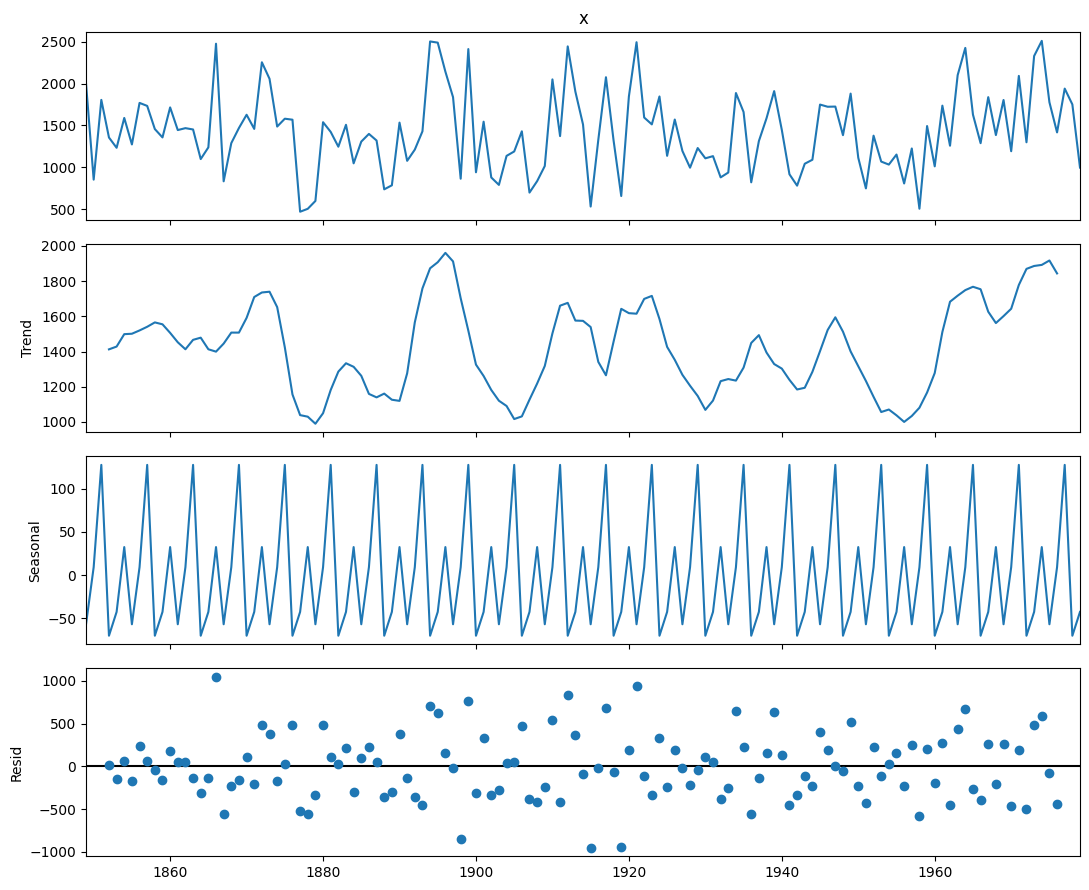

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(ts,
                               period=6)
decompose.plot()
plt.show()

In [6]:
nottrend = []
s = 6
notseason = []

# выборка без тренда
for i in range(1, len(ts)):
   nottrend.append(ts[ts.index[i]] - ts[ts.index[i-1]])

# выборка без сезонности
for i in range(s, len(ts)):
   notseason.append(ts[ts.index[i]] - ts[ts.index[i-s]])

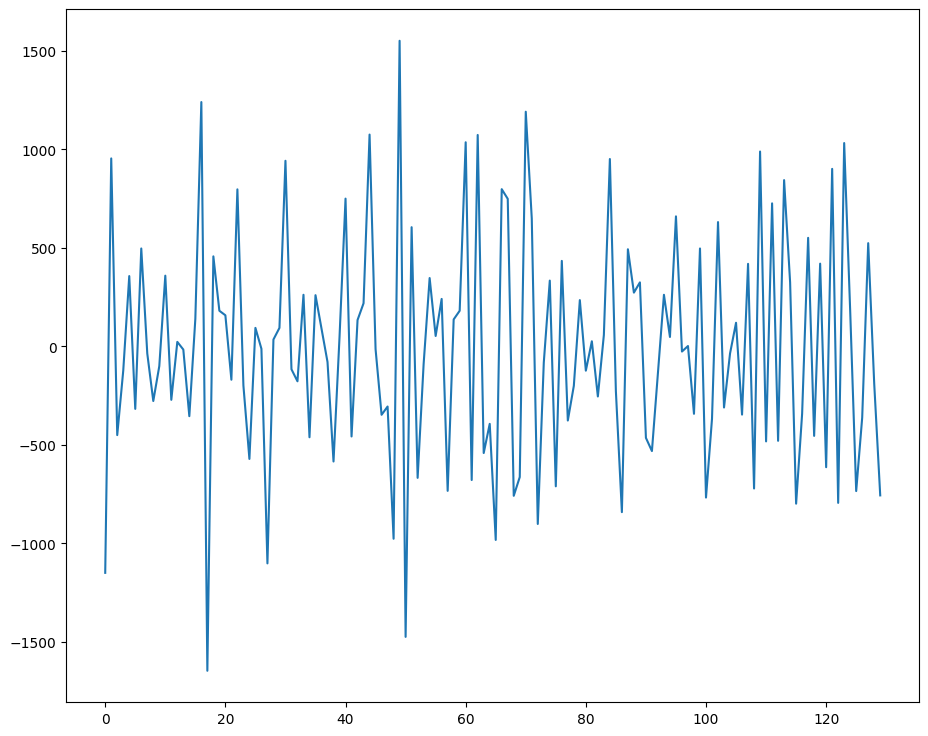

In [7]:
plt.plot(nottrend)

In [8]:
alpha = 0.05
name = "Осадки без тренда"

ts = nottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Осадки без тренда :
Test Statistic                -6.721838e+00
p-value                        3.467312e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.210000e+02
Critical Value (1%)           -3.485585e+00
Critical Value (5%)           -2.885739e+00
Critical Value (10%)          -2.579676e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


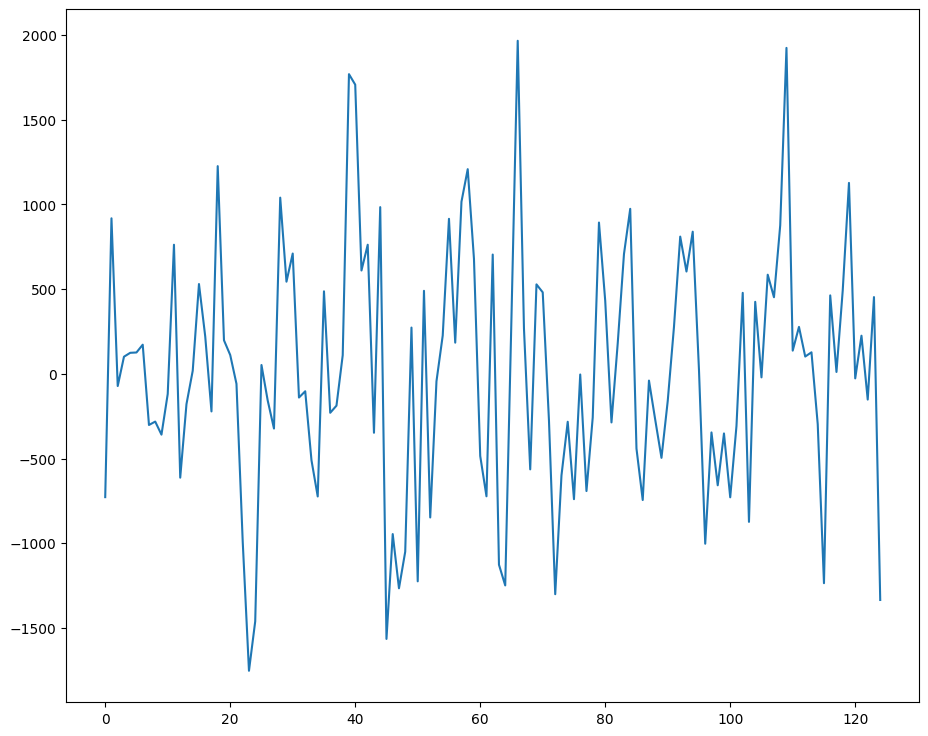

In [9]:
plt.plot(notseason)

In [10]:
alpha = 0.05
name = "Осадки без сезона"

ts = notseason

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Осадки без сезона :
Test Statistic                  -3.953452
p-value                          0.001675
#Lags Used                      12.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


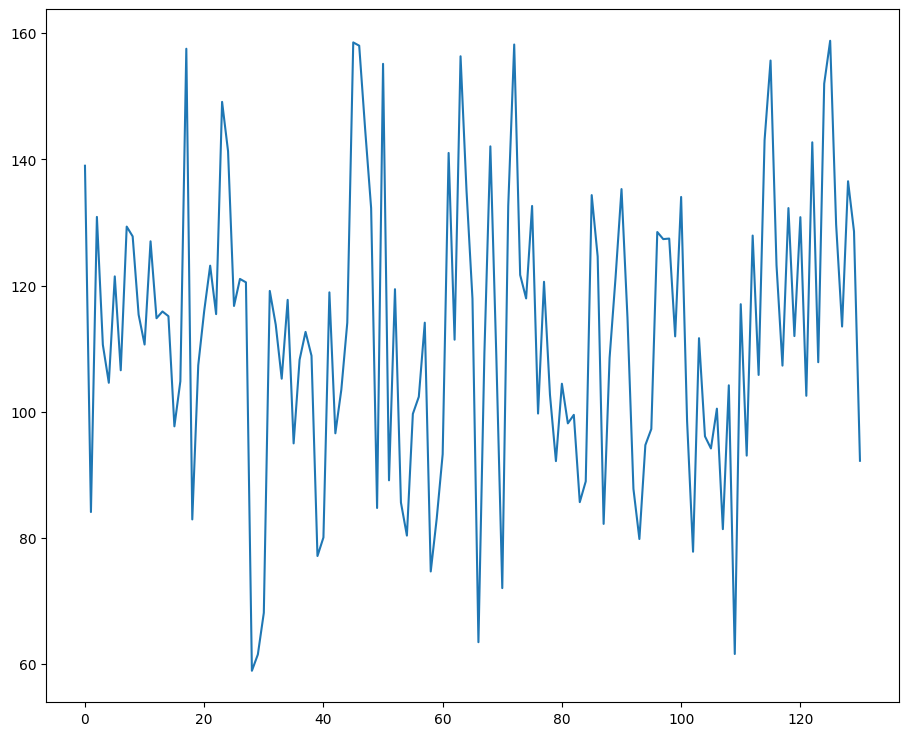

In [11]:
from scipy.stats import boxcox

transformed_data, best_lambda = boxcox(rainfall['x'])

plt.plot(transformed_data)

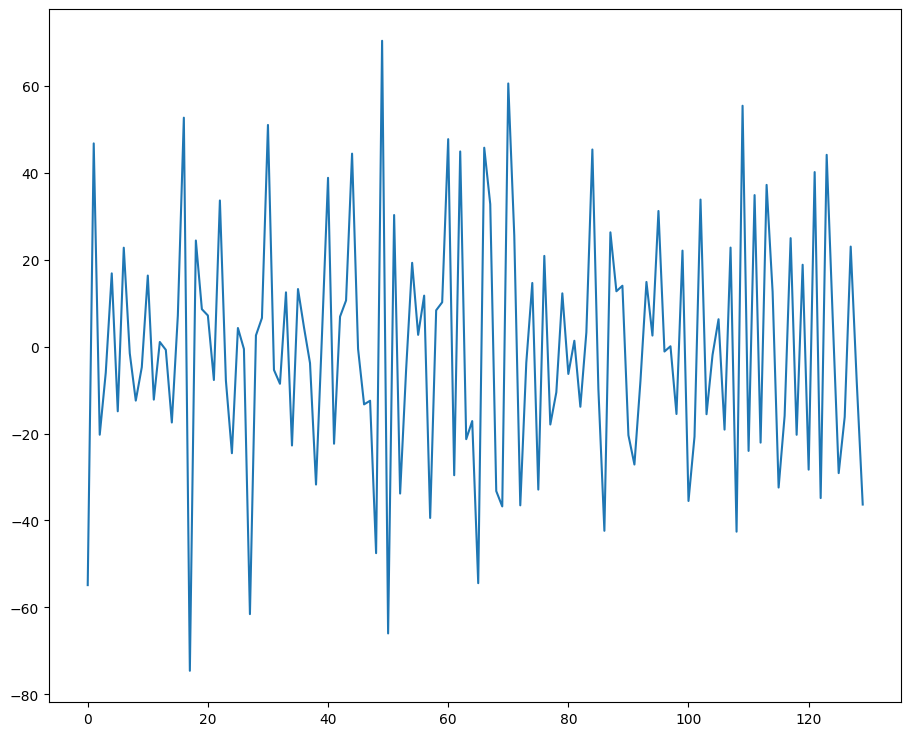

In [12]:
pnottrend = []

for i in range(1, len(transformed_data)):
   pnottrend.append(transformed_data[i] - transformed_data[i-1])

plt.plot(pnottrend)

In [13]:
alpha = 0.05
name = "Осадки после Кокса-Бокса"

ts = pnottrend

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha*100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Осадки после Кокса-Бокса :
Test Statistic                -6.861017e+00
p-value                        1.602485e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.210000e+02
Critical Value (1%)           -3.485585e+00
Critical Value (5%)           -2.885739e+00
Critical Value (10%)          -2.579676e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


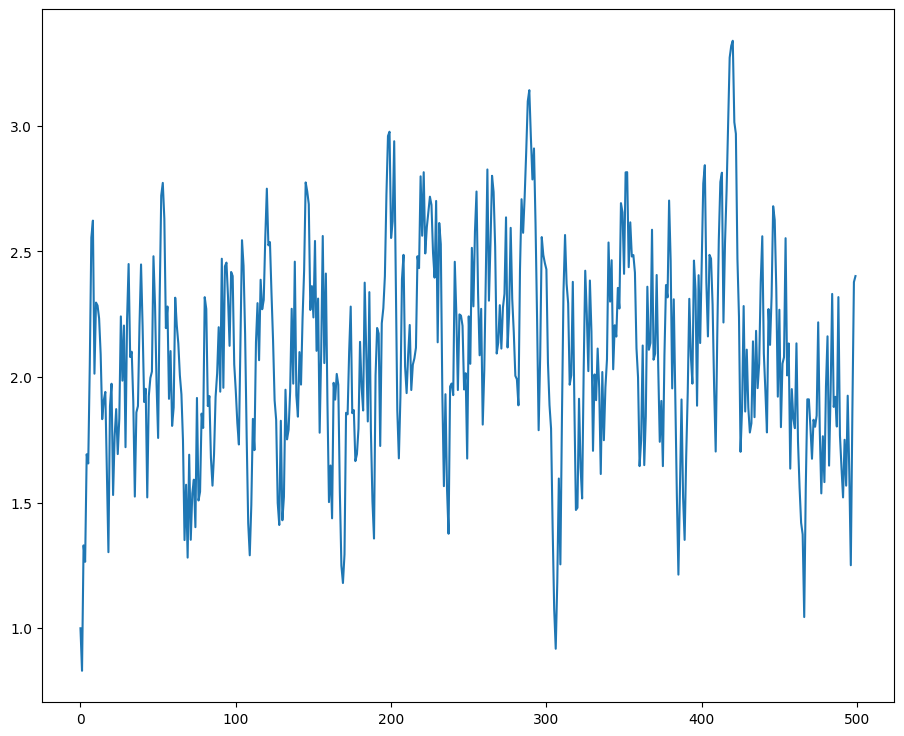

In [14]:
N = 500

ar1 = [1]

for i in range(1, N):
    ar1.append(0.76 * ar1[i-1] + np.random.random())

plt.plot(ar1)

In [15]:
print(f"standart deviation = {np.std(ar1)}\n mean = {np.mean(ar1)}")

standart deviation = 0.4128047085579234
 mean = 2.0899902273356554


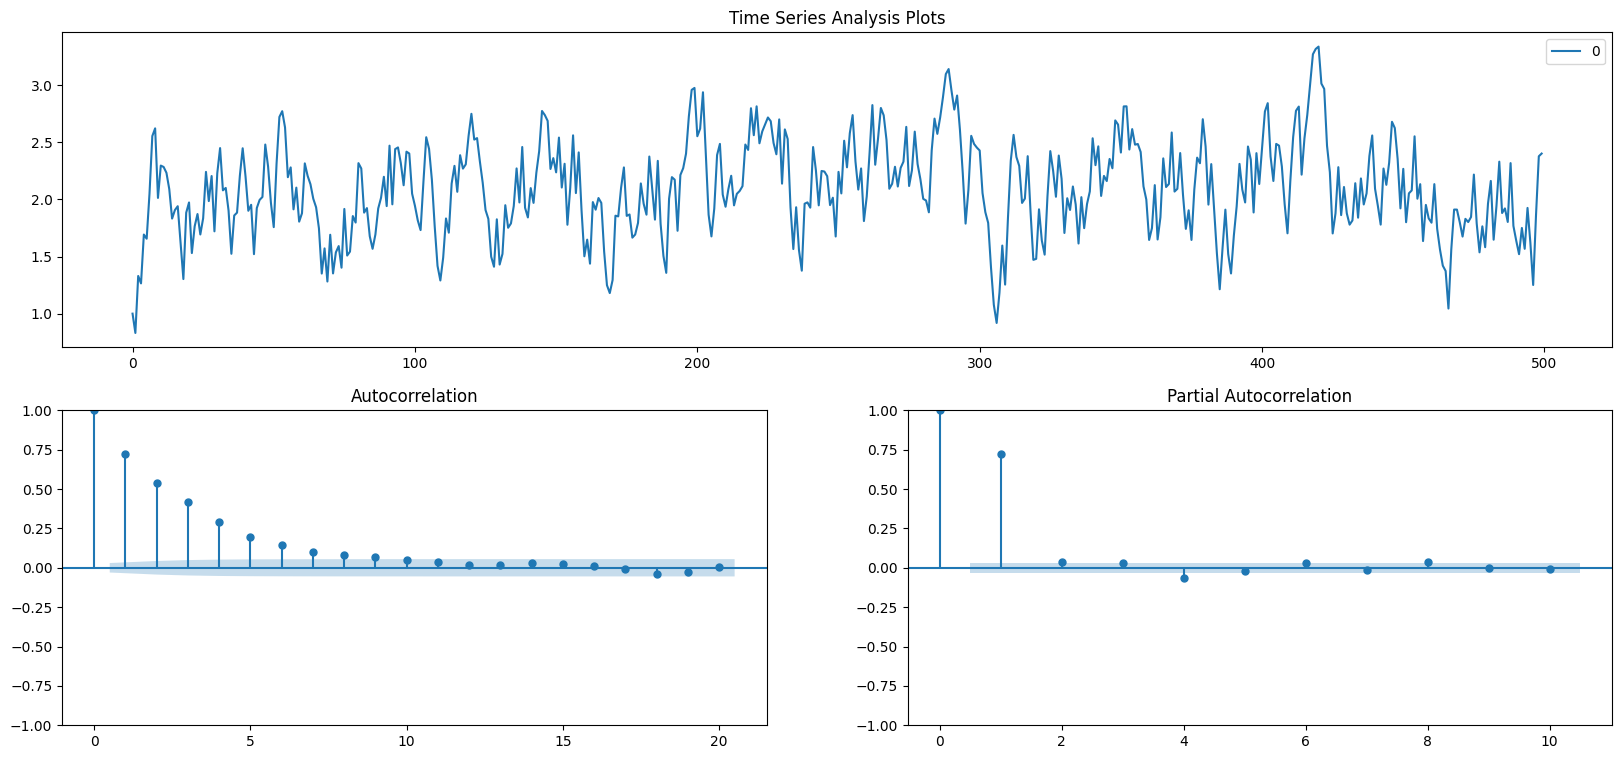

In [16]:
ts = pd.DataFrame(ar1)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
plt.show()

standart deviation = 0.4052587313130334
 mean = 0.272380566366055


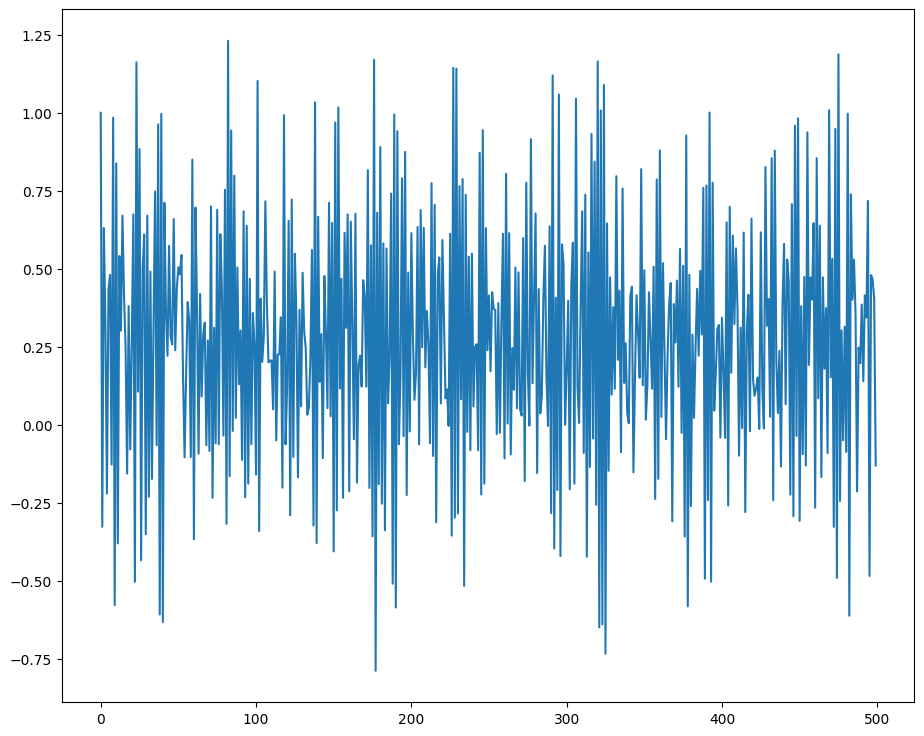

In [17]:
N = 500

ar2 = [1]

for i in range(1, N):
    ar2.append(- 0.76*ar2[i-1] + np.random.random())

plt.plot(ar2)

print(f"standart deviation = {np.std(ar2)}\n mean = {np.mean(ar2)}")

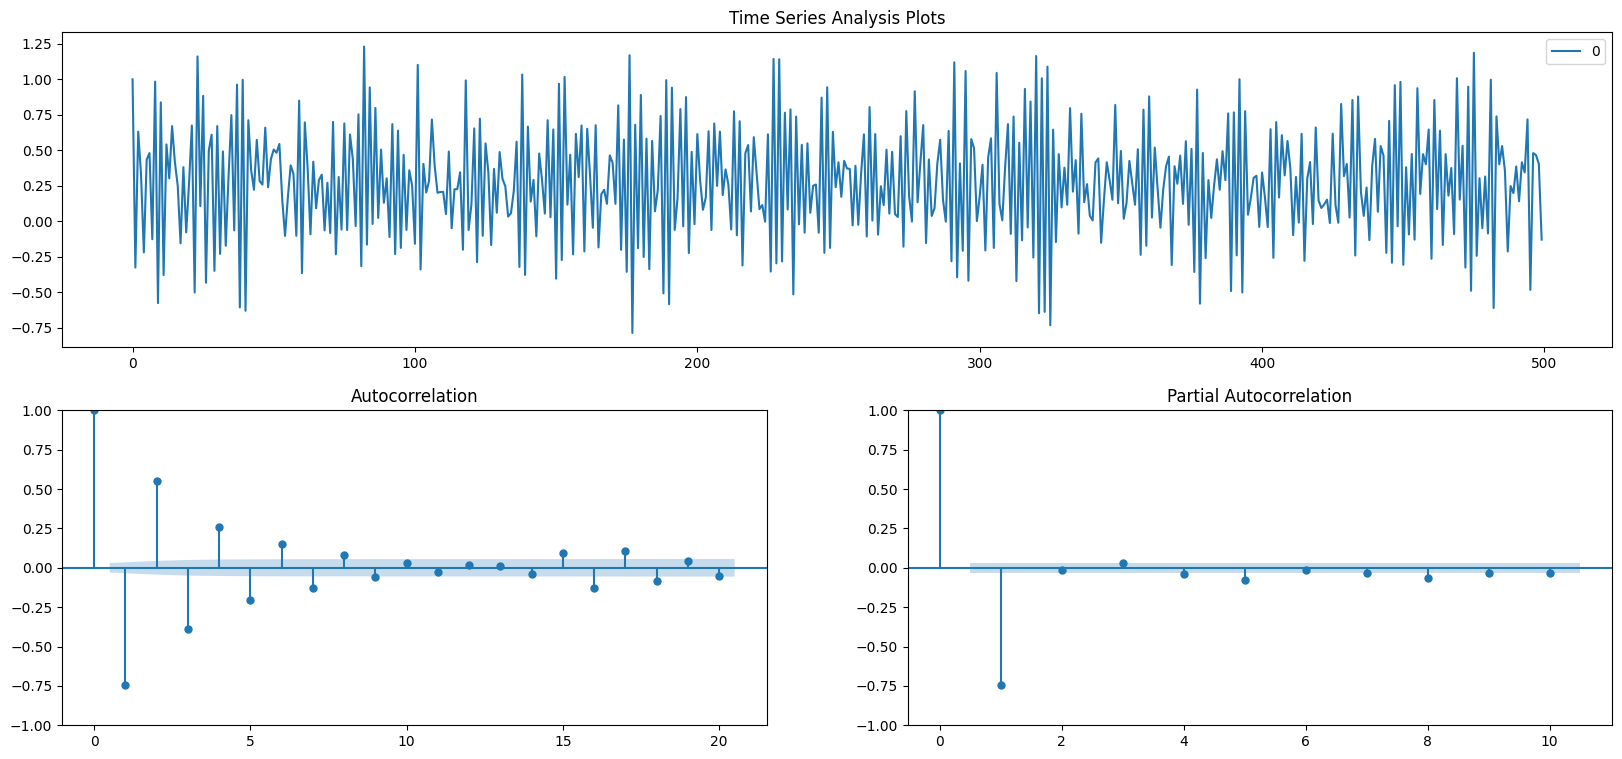

In [18]:
ts = pd.DataFrame(ar2)

fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=20, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=10, ax=pacf_ax, alpha=0.5)
plt.show()

standart deviation = 0.4052587313130334
 mean = 0.272380566366055


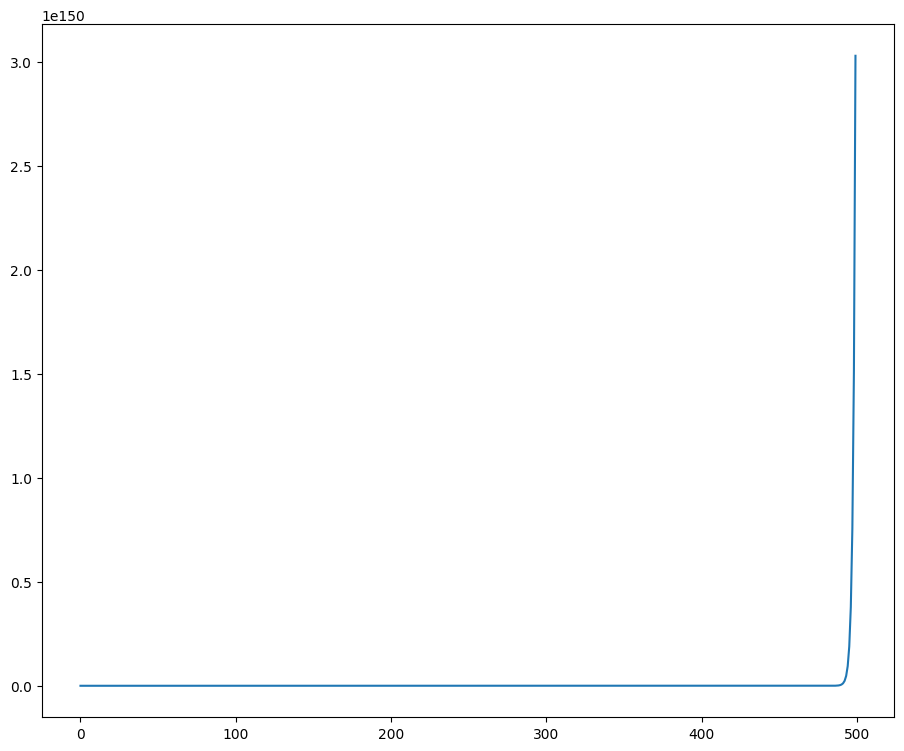

In [19]:
N = 500

ar3 = [1]

for i in range(1, N):
    ar3.append(2 * ar3[i-1] + np.random.random())

plt.plot(ar3)

print(f"standart deviation = {np.std(ar2)}\n mean = {np.mean(ar2)}")

In [20]:
df = pd.read_csv('data/Annual rainfall at fortaleza Brazil 18491979.csv', names=["n","x"], skiprows=1)


df['t'] = df.index.values

ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

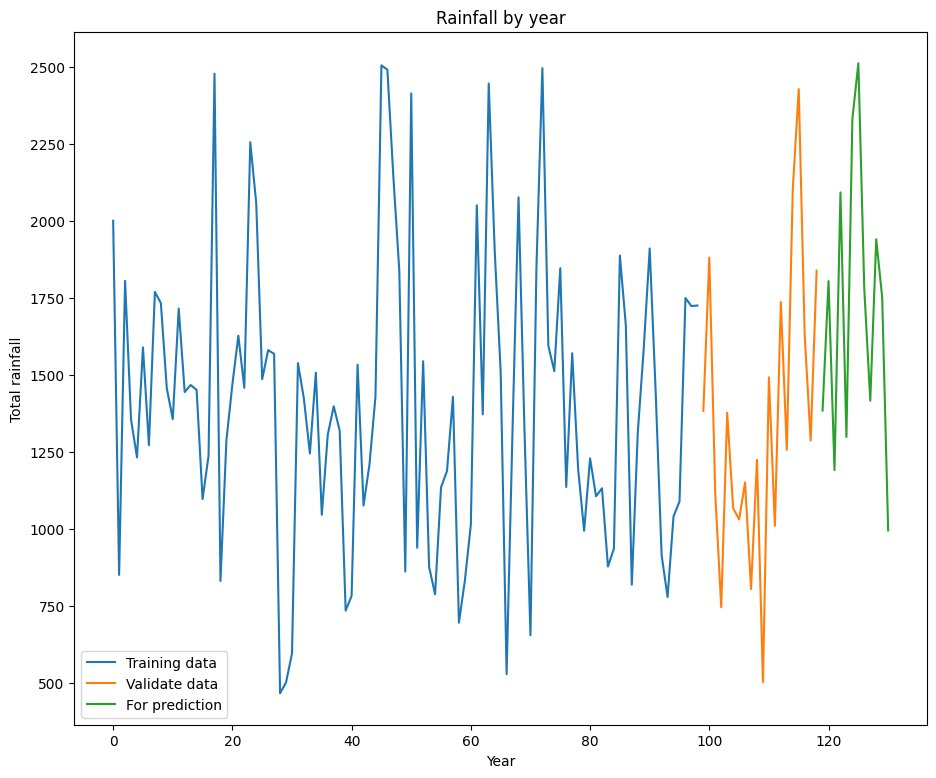

In [21]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')

plt.legend()
plt.title('Rainfall by year')
plt.ylabel('Total rainfall')
plt.xlabel('Year')
plt.show()

In [22]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [23]:
mod = AutoReg(df.t, 3, old_names=False)
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  131
Model:                     AutoReg(3)   Log Likelihood                3498.686
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Wed, 15 Nov 2023   AIC                          -6987.371
Time:                        00:18:33   BIC                          -6973.111
Sample:                             3   HQIC                         -6981.577
                                  131                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   1.92e-14   3.48e+13      0.000       0.667       0.667
t.L1           1.0000   1.89e-14   5.28e+13      0.000       1.000       1.000
t.L2           0.3333   2.58e-16   1.29e+15      0.0

In [24]:
res = mod.fit(cov_type="HC0")

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      t   No. Observations:                  131
Model:                     AutoReg(3)   Log Likelihood                3498.686
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Wed, 15 Nov 2023   AIC                          -6987.371
Time:                        00:18:33   BIC                          -6973.111
Sample:                             3   HQIC                         -6981.577
                                  131                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667   1.21e-14    5.5e+13      0.000       0.667       0.667
t.L1           1.0000   1.19e-14   8.42e+13      0.000       1.000       1.000
t.L2           0.3333   2.87e-16   1.16e+15      0.0

In [25]:
sel = ar_select_order(df.x, 13, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      x   No. Observations:                  131
Model:                     AutoReg(1)   Log Likelihood                -982.946
Method:               Conditional MLE   S.D. of innovations            465.067
Date:                Wed, 15 Nov 2023   AIC                           1971.891
Time:                        00:18:33   BIC                           1980.494
Sample:                             1   HQIC                          1975.387
                                  131                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1076.0845    127.943      8.411      0.000     825.321    1326.848
x.L1           0.2413      0.085      2.842      0.004       0.075       0.408
                                    Roots           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


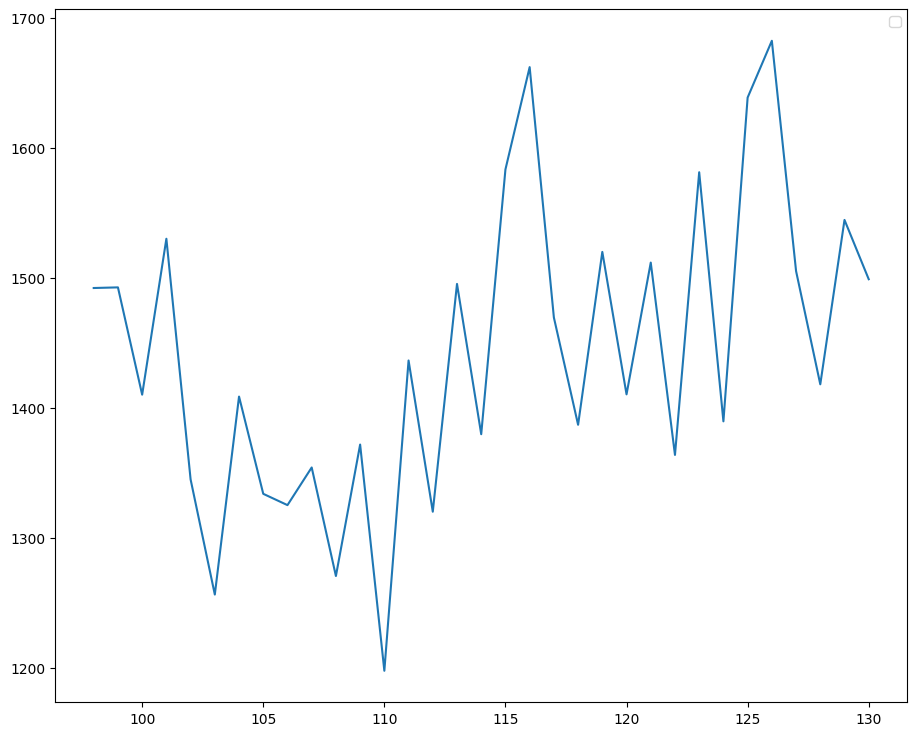

In [26]:
fig = res.plot_predict(train_cutoff)

In [27]:
pred = res.predict(start=0, end=train_cutoff, dynamic=False)
v_pred = res.predict(start=train_cutoff+1, end=(validate_cutoff), dynamic=False)
f_pred = res.predict(start=validate_cutoff + 1, end=(forecast_df.t[len(df.t)-1]), dynamic=False)

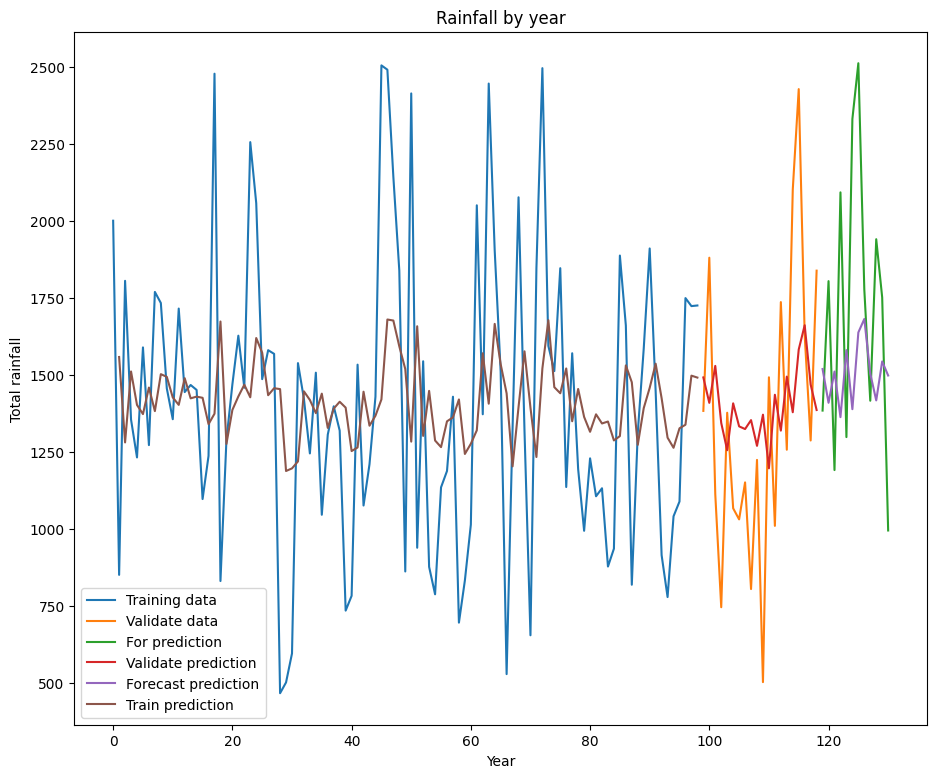

In [28]:
plt.plot(train_df.t, train_df.x, label='Training data')
plt.plot(validate_df.t, validate_df.x, label='Validate data')
plt.plot(forecast_df.t, forecast_df.x, label='For prediction')
plt.plot(validate_df.t, v_pred, label='Validate prediction ')
plt.plot(forecast_df.t, f_pred, label='Forecast prediction')
plt.plot(train_df.t, pred, label='Train prediction')

plt.legend()
plt.title('Rainfall by year')
plt.ylabel('Total rainfall')
plt.xlabel('Year')
plt.show()

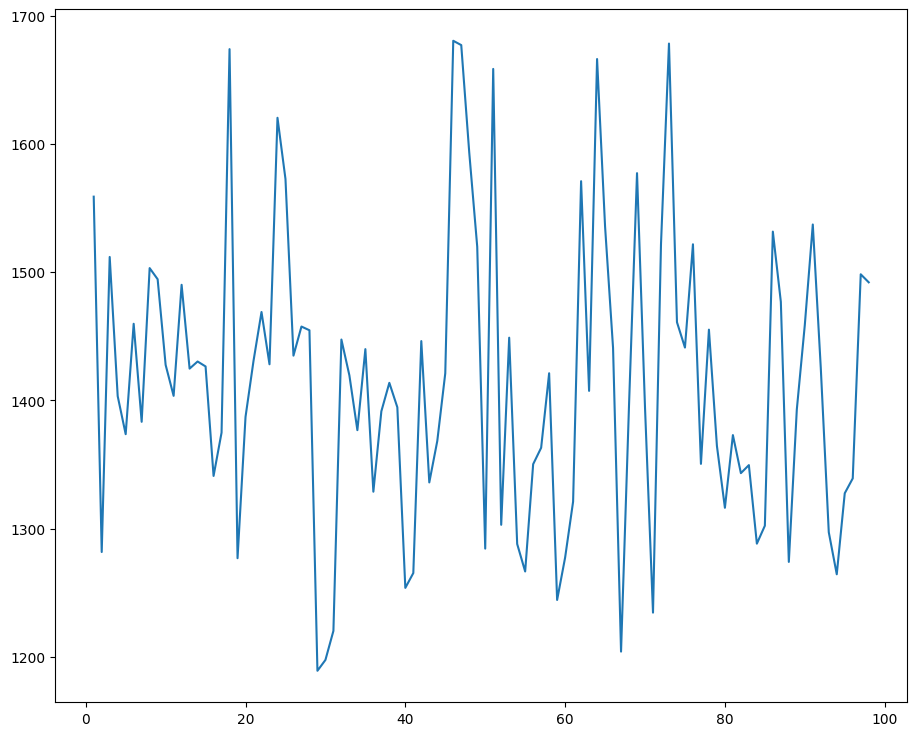

In [29]:
plt.plot(pred)

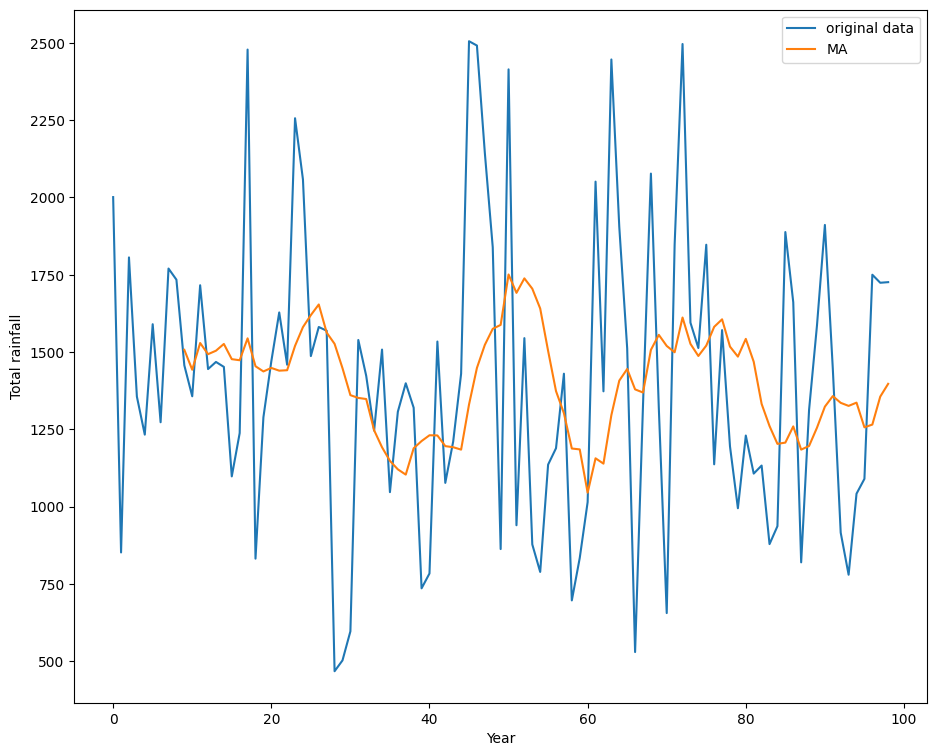

In [30]:
df['t'] = df.index.values

ln = len(df)

train_cutoff = int(round(ln*0.75, 0))
validate_cutoff = int(round(ln*0.90,0))

train_df = df[df['t'] <= train_cutoff]
validate_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]

plt.plot(train_df["t"], train_df["x"], label="original data")
plt.plot(train_df["t"], train_df["x"].rolling(10).mean(), label="MA")
plt.legend()
plt.ylabel('Total rainfall')
plt.xlabel('Year')
plt.show()

## Метрики точности прогноза

In [31]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

In [45]:
smape = sum([abs(forecast_df.x[forecast_df.x.index[i]] - f_pred[f_pred.index[i]]) / (abs(forecast_df.x[forecast_df.x.index[i]]) + abs(f_pred[f_pred.index[i]])) for i in range(len(forecast_df.x))]) * 100 / len(forecast_df.x)

print("RMSE:", np.sqrt(mean_squared_error(forecast_df.x, f_pred)))
print("MAPE:", mean_absolute_percentage_error(forecast_df.x, f_pred))
print("SMAPE:", smape)
print("MAE:", mean_absolute_error(forecast_df.x, f_pred))
print("R2: ", r2_score(forecast_df.x, f_pred))

RMSE: 510.1701166467535
MAPE: 0.24251835791994733
SMAPE: 12.815598469155795
MAE: 424.3992292780243
R2:  -0.31076542706932475
